# Phase 3 Review

![review guy](https://media.giphy.com/media/3krrjoL0vHRaWqwU3k/giphy.gif)

# TOC 

1. [Gradient Descent](#grad_desc)
2. [Logistic Regression](#logistic)
3. [Confusion Matrix](#con_mat)
4. [Accuracy/Precision/Recall/F1](#more_metric)
5. [auc_roc](#auc_roc)
3. [Algos](#algos)

In [1]:
from src.student_caller import one_random_student
from src.student_list import quanggang

<a id='grad_desc'></a>

## Gradient Descent

Question: What is a loss function? (Explain it in terms of the relationship between true and predicted values) 


In [2]:
one_random_student(quanggang)

Christos


In [3]:
#__SOLUTION__
'''A loss function calculates how far off our algorithm's predictions are from the true values.  
It quantifies the overall accuracy of our algorithm, and allows us to identify how to tune the algorithms
parameters in a way to improve performance'''

"A loss function calculates how far off our algorithm's predictions are from the true values.  \nIt quantifies the overall accuracy of our algorithm, and allows us to identify how to tune the algorithms\nparameters in a way to improve performance"

Question: What loss functions do we know and what types of data work best with each?

In [4]:
one_random_student(quanggang)


Jamie


In [5]:
#__SOLUTION__
'''
Mean Square Error: Used for continuous variables in regression.
Mean Square Error with Ridge Penalty: Shrink coefficients in linear regression.
Mean Square Error with Lasso Penalty: Zero out coefficients in linear regression.
Log-loss: Used for binary categorical variables.
Log-loss with Ridge Penalty: Shrink coefficients in logistic regression.
Log-loss with Lasso Penalty: Zero out coefficients in logistic regression.
'''

'\nMean Square Error: Used for continuous variables in regression.\nMean Square Error with Ridge Penalty: Shrink coefficients in linear regression.\nMean Square Error with Lasso Penalty: Zero out coefficients in linear regression.\nLog-loss: Used for binary categorical variables.\nLog-loss with Ridge Penalty: Shrink coefficients in logistic regression.\nLog-loss with Lasso Penalty: Zero out coefficients in logistic regression.\n'

To solidify our knowledge of gradient descent, we will use Sklearn's stochastic gradient descent algorithm for regression [SGDRegressor](https://scikit-learn.org/stable/modules/sgd.html#regression).   Sklearn classifiers share many methods and parameters, such as fit/predict, but some have useful additions.  SGDRegressor has a new method called partial_fit, which will allow us to inspect the calculated coefficients after each step of gradient descent.  

In [6]:
from sklearn.datasets import load_diabetes
import numpy as np

data = load_diabetes(as_frame=True)
X = data['data']
y = data['target']

In [7]:
X.shape

(442, 10)

In [8]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [9]:
from sklearn.linear_model import SGDRegressor

In [10]:
# Instantiate a SGDRegressor object and run partial fit on X and y. For now, pass the argument `penalty=None`

In [11]:
one_random_student(quanggang)

Marcos


In [12]:
#__SOLUTION__
sgd = SGDRegressor(penalty=None)
sgd.partial_fit(X, y)

SGDRegressor(penalty=None)

In [13]:
# Inspect the coefficient array

In [14]:
one_random_student(quanggang)

Marcos


In [15]:
#__SOLUTION__
sgd.coef_

array([ 1.14369932,  0.23643792,  2.62864563,  2.32491401,  1.02187565,
        0.97950618, -1.91520752,  2.14314074,  2.55839378,  1.70837102])

In [16]:
# Import mean_squared_error from metrics, and pass in the true ys, an array of predictions
# and the agrument squared = False

In [17]:
one_random_student(quanggang)

Rachel


In [18]:
#__SOLUTION__
from sklearn.metrics import mean_squared_error
mean_squared_error(y, sgd.predict(X), squared=False)

87.44590196675651

In [19]:
# Repeat the partial fit. Inspect, RMSE, coefficients.

In [20]:
one_random_student(quanggang)

Jamie


In [21]:
#__SOLUTION__
sgd.partial_fit(X,y)

print(mean_squared_error(y, sgd.predict(X), squared=False))
sgd.coef_

78.51337651252621


array([ 1.76153339,  0.37658947,  4.48661335,  3.72545078,  1.6778207 ,
        1.51786654, -3.13154746,  3.45417095,  4.32147277,  2.8852387 ])

Pick a coefficient, and explain the gradient descent update.


In [22]:
# code

In [23]:
#__SOLUTION__
coefs = []
loss = []

sgd = SGDRegressor(penalty=None)
for _ in range(7000):
    sgd.partial_fit(X, y)
    loss.append(mean_squared_error(y, sgd.predict(X), squared=False))
    coefs.append(sgd.coef_[2])

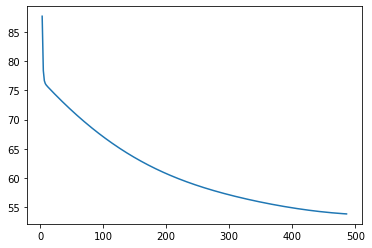

In [24]:
#__SOLUTION__
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(coefs, loss)

In [25]:
# code

In [26]:
#__SOLUTION__
sgd_full = SGDRegressor(penalty=None,)
sgd.fit(X,y, )

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(penalty=None)

In [27]:
#__SOLUTION__
sgd.coef_[2]

279.63063628387323

<a id='logistic'></a>

# Logistic Regression and Modeling

What type of target do we feed the logistic regression model?

In [28]:
#__SOLUTION__
'''
Logistic regression takes a categorical target variable.  
'''

'\nLogistic regression takes a categorical target variable.  \n'

In [29]:
one_random_student(quanggang)

Svitlana


In [30]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
X = data['data']
y = data['target']

In [31]:
# Perform a train-test split

In [32]:
one_random_student(quanggang)

Svitlana


In [33]:
#__SOLUTION__
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

Question: What is the purpose of train/test split?  


In [34]:
one_random_student(quanggang)

Svitlana


Question: Why should we never fit to the test portion of our dataset?

In [35]:
one_random_student(quanggang)

Rachel


In [36]:
# Scale the training set using a standard scaler
ss = None
X_train_scaled = None

In [37]:
one_random_student(quanggang)

Rachel


In [38]:
#__SOLUTION__
from sklearn.preprocessing import StandardScaler
import pandas as pd
ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

In [39]:
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
287,-0.349138,-1.438513,-0.411726,-0.390479,-1.863662,-1.268607,-0.826171,-0.952866,-1.729368,-0.941541,...,-0.542685,-1.655655,-0.589864,-0.525560,-1.510669,-0.891500,-0.750217,-0.916711,-0.925086,-0.808411
512,-0.204687,0.312640,-0.133673,-0.275880,1.078073,0.863546,0.726314,0.898441,1.178770,1.474377,...,0.041487,0.689899,0.194128,-0.051934,1.129415,0.923942,1.222217,1.436560,1.149559,1.569111
402,-0.329312,-0.215072,-0.317394,-0.364357,-1.579880,-0.457451,-0.597310,-0.764588,0.275343,-0.501024,...,-0.435901,-0.148985,-0.320159,-0.446032,-1.634396,-0.106752,-0.539891,-0.723713,0.534970,-0.619348
446,1.027403,2.089824,1.046922,0.917584,0.316303,0.562037,1.048527,0.930437,-0.325697,-0.477474,...,1.113515,2.165006,1.165793,0.997696,0.383604,0.860948,1.872819,1.310691,0.152884,0.421636
210,1.828969,0.696001,1.763681,1.783821,-0.333674,0.628175,0.974660,1.265740,-0.131572,-1.713139,...,1.471556,0.387568,1.556276,1.385595,-0.577759,0.296680,0.595768,1.232995,0.050452,-1.406351


Question: Why is scaling our data important? For part of your answer, relate to one of the advantages of logistic regression over another classifier.

In [40]:
# fit model with logistic regression to the appropriate portion of our dataset

In [41]:
one_random_student(quanggang)

Rachel


In [42]:
#__SOLUTION__
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

Now that we have fit our classifier, the object `lr` has been filled up with information about the best fit parameters.  Take a look at the coefficients held in the `lr` object.  Interpret what their magnitudes mean.

In [43]:
# Inspect the .coef_ attribute of lr and interpret

In [44]:
one_random_student(quanggang)

Rachel


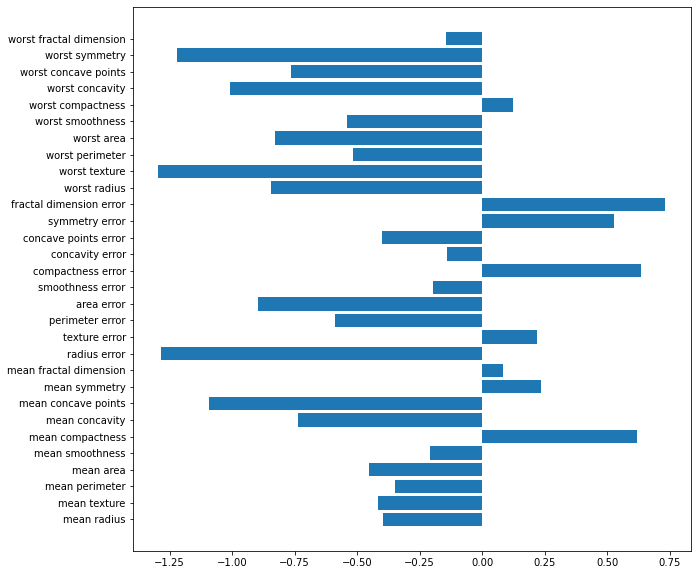

In [45]:
#__SOLUTION__
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(X.columns, lr.coef_[0])
ax.tick_params(axis='x')


Logistic regression has a predict method just like linear regression.  Use the predict method to generate a set of predictions (y_hat_train) for the training set.

In [46]:
# use predict to generate a set of predictions
y_hat_train = None

In [47]:
one_random_student(quanggang)


Jamie


In [48]:
#__SOLUTION__
y_hat_train = lr.predict(X_train_scaled)
y_hat_train

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,

<a id='con_mat'></a>

### Confusion Matrix

Confusion matrices are a great way to visualize the performance of our classifiers. 

Question: What does a good confusion matrix look like?

In [49]:
one_random_student(quanggang)

Jamie


In [50]:
# create a confusion matrix for our logistic regression model fit on the scaled training data

In [51]:
one_random_student(quanggang)

Christos


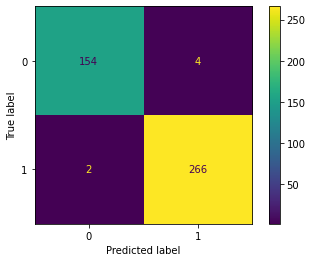

In [52]:
#__SOLUTION__
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
confusion_matrix(y_train, y_hat_train)
plot_confusion_matrix(lr, X_train_scaled, y_train)

<a id='more_metrics'></a>

## Accuracy/Precision/Recall/F_1 Score

We have a bunch of additional metrics, most of which we can figure out from the CM

Question: Define accuracy. What is the accuracy score of our classifier?

In [54]:
tn = confusion_matrix(y_train, y_hat_train)[0,0]
tp = confusion_matrix(y_train, y_hat_train)[1,1]
fp = confusion_matrix(y_train, y_hat_train)[0,1]
fn = confusion_matrix(y_train, y_hat_train)[1,0]

In [ ]:
# Confirm accuracy in code

In [56]:
(tp + tn)/(tp + tn + fp + fn)


0.9859154929577465

Question: Why might accuracy fail to be a good representation of the quality of a classifier?

In [ ]:

one_random_student(quanggang)

Question: Define recall. What is the recall score of our classifier?

In [ ]:
# Confirm recall in code

In [59]:
recall = tp / (tp + fn)
recall

0.9925373134328358

Question: Define precision? What is the precision score of our classifier?

In [60]:
# Confirm precision in code

In [61]:
precision = tp / (tp + fp)
precision

0.9851851851851852

Question: Define f1 score? What is the f1 score score of our classifier?

In [63]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.9888475836431226

<a id='auc_roc'></a>

## Auc_Roc

The AUC_ROC curve can't be deduced from the confusion matrix.  Describe what the AUC_ROC curve shows. 
Look [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) for some nice visualizations of AUC_ROC.

In [ ]:

one_random_student(quanggang)

One of the advantages of logistic regression is that it generates a set of probabilities associated with each prediction.  What is the default threshold?  How would decrease or increasing your threshold affect true positive and false positive rates?


For our scaled X_train, generate an array of probabilities associated with the probability of the positive class.

In [ ]:
# your code here

In [ ]:

one_random_student(quanggang)

In [64]:
#__SOLUTION__
y_hat_train_proba = lr.predict_proba(X_train_scaled)[:, 1]

Now, using those probabilities, create two arrays, one which converts the probabilities to label predictions using the default threshold, and one using a threshold of .4.  How does it affect our metrics?

In [65]:
# Plot the AUC_ROC curve for our classifier

In [66]:
#__SOLUTION__
from sklearn.metrics import roc_auc_score
y_hat_train_proba = lr.predict_proba(X_train_scaled)[:,1]

roc_auc_score(y_train, y_hat_train_proba)

0.9972369166824107

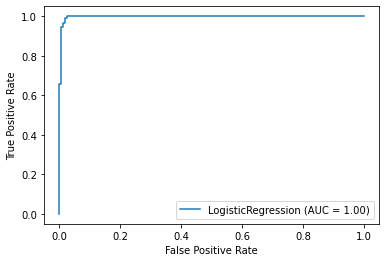

In [67]:
#__SOLUTION__
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_train_scaled, y_train)

<a id='algos'></a>

# More Algorithms

Much of the sklearn syntax is shared across classifiers and regressors.  Fit, predict, score, and more are methods associated with all sklearn classifiers.  They work differently under the hood. KNN's fit method simply stores the training set in memory. Logistic regressions .fit() does the hard work of calculating coefficients. 

![lazy_george](https://media.giphy.com/media/8TJK6prvRXF6g/giphy.gif)

However, each algo also has specific parameters and methods associated with it.  For example, decision trees have feature importances and logistic has coefficients. KNN has n_neighbors and decision trees has max_depth.


Getting to know the algo's and their associated properties is an important area of study. 

That being said, you now are getting to the point that no matter which algorithm you choose, you can run the code to create a model as long as you have the data in the correct shape. Most importantly, the target is the appropriate form (continuous/categorical) and is isolated from the predictors.

Here are the algos we know so far. 
 - Linear Regression
 - Lasso/Ridge Regression
 - Logistic Regression
 - Naive-Bayes
 - KNN
 - Decision Trees
 
> Note that KNN and decision trees also have regression classes in sklearn.


Here are two datasets from seaborn and sklearn.  Let's work through the process of creating simple models for each.

In [104]:
import seaborn as sns
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [105]:
# split target from predictors
penguins.dropna(inplace=True)

In [106]:
X = penguins.drop('sex', axis = 1)
y = penguins['sex'].map({'Male': 0, 'Female': 1})

In [107]:
y

0      0
1      1
2      1
4      1
5      0
      ..
338    1
340    1
341    0
342    1
343    0
Name: sex, Length: 333, dtype: int64

In [108]:
# isolate numeric predictors

In [109]:
X_numeric = X[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
X_train, X_test, y_train, y_test = train_test_split(X_numeric,y, random_state=42)

In [110]:
# Scale appropriately


In [111]:
ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns, index=X_test.index)

In [112]:
# instantiate appropriate model and fit to appropriate part of data.
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [118]:
# Create a set of predictions

y_hat_train = dt.predict_proba(X_train_scaled)[:, 1]
y_hat_test = dt.predict_proba(X_test_scaled)[:, 1]


In [119]:
one_random_student(quanggang)

Jamie


In [120]:
# Create and analyze appropriate metrics

In [124]:
roc_auc_score(y_train, y_hat_train)

1.0

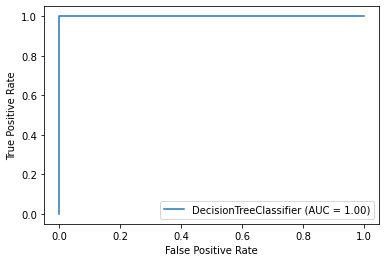

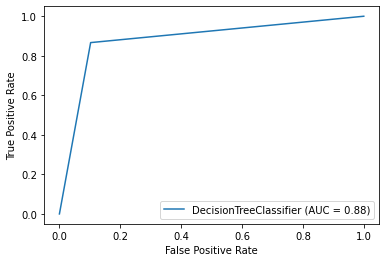

In [125]:
plot_roc_curve(dt, X_train_scaled, y_train)
plot_roc_curve(dt, X_test_scaled, y_test)

In [117]:
one_random_student(quanggang)

Rachel


In [126]:
from sklearn.datasets import load_boston
data = load_boston()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']

In [127]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
# split target from predictors

In [ ]:
one_random_student(quanggang)

In [ ]:
# isolate numeric predictors

In [ ]:
one_random_student(quanggang)

In [ ]:
# Scale appropriately


In [ ]:
one_random_student(quanggang)

In [ ]:
# instantiate appropriate model and fit to appropriate part of data.


In [ ]:
one_random_student(quanggang)

In [ ]:
# Create a set of predictions

y_hat_train = None
y_hat_test = None


In [ ]:
one_random_student(quanggang)

In [ ]:
# Create and analyze appropriate metrics

In [ ]:
one_random_student(quanggang)